# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [2]:
# !pip install pandas
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [3]:
df = pd.read_csv(r'lab12_files\US_Baby_Names_right.csv')

# print(df.to_string()) 

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [4]:
print(len(df.index))

1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [11]:
print(df.head(10))

   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [20]:
df.drop(df.columns[[0,1]], axis=1)


,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [24]:
femCount = df.loc[df.Gender == 'F', 'Gender'].count()
malCount = df.loc[df.Gender == 'M', 'Gender'].count()
print(femCount)
print(malCount)
print(malCount + femCount)

558846
457549
1016395


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [26]:

dfTop10 = df.groupby('Name')['Count'].sum().reset_index().sort_values(by='Count', ascending=False).head(10)
print(dfTop10)


           Name   Count
7198      Jacob  242874
5378       Emma  214852
12111   Michael  214405
5579      Ethan  209277
6973   Isabella  204798
16746   William  197894
8568     Joshua  191551
15373    Sophia  191446
4166     Daniel  191440
5367      Emily  190318


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

<Axes: >

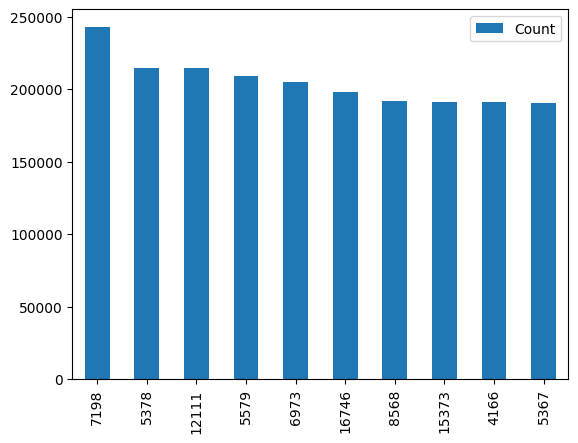

In [24]:
import matplotlib.pyplot as plt

dfTop10.plot(kind='bar')



Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [18]:
print(df.groupby(by=['Name']).size().count())

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [21]:
import numpy as np
def load_names():
    """
    Wczytuje plik z imionami i liczy częstotliwości występowania każdego imienia.

    :param file_path: Ścieżka do pliku z imionami (np. CSV lub TXT)
    :return: DataFrame z kolumnami 'name' i 'frequency'
    """
    # Wczytaj dane
    df = pd.read_csv(r'lab12_files\US_Baby_Names_right.csv', header=None, names=['Name'])

    # Oblicz częstotliwość występowania każdego imienia
    name_counts = df['Name'].value_counts().reset_index()
    name_counts.columns = ['name', 'frequency']

    return name_counts

def get_random_name(name_counts):
    """
    Zwraca losowe imię z prawdopodobieństwem proporcjonalnym do jego częstotliwości.

    :param name_counts: DataFrame z kolumnami 'name' i 'frequency'
    :return: Losowe imię
    """
    return np.random.choice(
        name_counts['name'], 
        p=name_counts['frequency'] / name_counts['frequency'].sum()
    )

print(get_random_name(load_names()))

C:\Users\Karol\AppData\Local\Temp\ipykernel_6420\298244812.py:10: DtypeWarning: Columns (1,3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'lab12_files\US_Baby_Names_right.csv', header=None, names=['Name'])


97


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.